In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
iris=datasets.load_iris()
u=iris.target
v=iris.data
print(u)
print(v)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
utrain,utest,vtrain,vtest=train_test_split(u,v,test_size=.25,random_state=25)
print(utest)
print(utrain)
print(vtest)
print(vtrain)

[0 1 1 1 2 1 2 0 1 1 0 0 0 2 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 1 1
 0]
[0 0 0 0 0 0 2 0 0 1 0 2 2 0 0 2 1 2 2 1 2 1 2 2 1 0 2 1 2 0 1 1 0 0 2 1 1
 0 2 1 2 1 2 0 0 1 0 0 1 2 0 2 1 1 1 2 1 0 2 0 0 1 1 2 2 1 0 2 0 0 1 1 0 0
 0 2 2 2 2 0 1 2 1 0 0 1 1 2 2 2 1 0 1 2 0 0 0 2 0 1 2 1 0 2 1 2 2 2 1 2 1
 2]
[[5.2 3.4 1.4 0.2]
 [6.3 2.5 4.9 1.5]
 [5.9 3.2 4.8 1.8]
 [6.  3.4 4.5 1.6]
 [6.4 2.8 5.6 2.1]
 [6.7 3.1 4.4 1.4]
 [6.1 3.  4.9 1.8]
 [4.4 3.2 1.3 0.2]
 [5.5 2.4 3.7 1. ]
 [5.  2.3 3.3 1. ]
 [5.1 3.7 1.5 0.4]
 [5.4 3.4 1.5 0.4]
 [5.  3.4 1.6 0.4]
 [6.3 2.8 5.1 1.5]
 [4.6 3.4 1.4 0.3]
 [6.6 2.9 4.6 1.3]
 [7.2 3.2 6.  1.8]
 [6.9 3.1 5.4 2.1]
 [5.6 2.9 3.6 1.3]
 [5.6 2.7 4.2 1.3]
 [5.7 2.6 3.5 1. ]
 [5.7 2.8 4.1 1.3]
 [5.6 3.  4.5 1.5]
 [5.4 3.4 1.7 0.2]
 [4.9 3.1 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [5.6 2.5 3.9 1.1]
 [7.7 2.8 6.7 2. ]
 [6.9 3.2 5.7 2.3]
 [4.5 2.3 1.3 0.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.5 5.  2. ]
 [7.7 3.  6.1 2.3]
 [5.  3.6 1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [6.9 3.1 4.9 1.5]
 [6.2 2.

In [9]:
NB=GaussianNB()
NB.fit(vtrain,utrain)
u_predict=NB.predict(vtest)
print("______test clas_______",utest)
print("______predict class______",u_predict)
print("Accuracy:",accuracy_score(utest,u_predict,normalize=True))

______test clas_______ [0 1 1 1 2 1 2 0 1 1 0 0 0 2 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 1 1
 0]
______predict class______ [0 1 2 1 2 1 2 0 1 1 0 0 0 1 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 2 1
 0]
Accuracy: 0.9210526315789473


[[11  0  0]
 [ 0 14  2]
 [ 0  1 10]]


<function matplotlib.pyplot.show(close=None, block=None)>

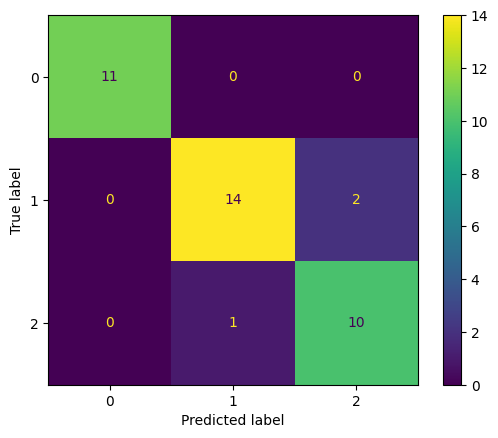

In [11]:
cm=confusion_matrix(utest,u_predict,normalize=None)
print(cm)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_dis.plot()
plt.show